In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [105]:
color_map = {'Residential':'red', 'Commercial':'cyan','Industrial':'black', 'Agricultural':'green', 'Street/Outdoor':'grey','Unmapped':'grey'}

all_utils = pd.read_csv('../datafiles/out_ferc1__yearly_sales_by_rate_schedules_sched304.csv')
CA_IOUs = all_utils[(all_utils['utility_name_ferc1'].str.contains("PACIFIC GAS|Southern California|San Diego"))&(all_utils['billing_status']=='billed')]
CA_IOUs = CA_IOUs[~CA_IOUs['rate_schedule_description'].str.contains("total",na=False)]
CA_IOUs = CA_IOUs[CA_IOUs['rate_schedule_description'].notna()]
CA_IOUs

,rowid,utility_id_ferc1,utility_id_ferc1_label,utility_id_pudl,utility_id_pudl_label,utility_name_ferc1,report_year,rate_schedule_type,billing_status,rate_schedule_description,sales_mwh,dollar_value,avg_customers_per_month,kwh_per_customer,revenue_per_kwh,record_id
289,270185,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOU-D-PRIME/BUND/NEMA2.0/SEP,0.0,20.0,0.0,NaN,NaN,sales_of_electricity_by_rate_schedules_account...
290,270186,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOU-D-PRIME/CCA/NEM2.0,9338.0,1594665.0,2030.0,4600.000000,0.1708,sales_of_electricity_by_rate_schedules_account...
291,270187,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOU-D-PRIME/CCA/NEM1.0/SEP,37.0,1994.0,6.0,6166.666504,0.0539,sales_of_electricity_by_rate_schedules_account...
292,270188,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOU-D-PRIME/CCA/NEM1.0,21044.0,3207591.0,1875.0,11223.466797,0.1524,sales_of_electricity_by_rate_schedules_account...
293,270189,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,residential,billed,TOU-D-PRIME/BUND/NEMPS1.0,2090.0,469069.0,244.0,8565.574219,0.2244,sales_of_electricity_by_rate_schedules_account...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9353,287219,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,interdepartmental,billed,GS-1/BUND,28.0,6791.0,6.0,4666.666504,0.2425,sales_of_electricity_by_rate_schedules_account...
9354,287220,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,interdepartmental,billed,PA-2/BUND,1218.0,195826.0,7.0,174000.000000,0.1608,sales_of_electricity_by_rate_schedules_account...
9355,287221,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,interdepartmental,billed,TOU-D-PRIME-SDP/BUND/NEM2.0,0.0,-17.0,0.0,NaN,NaN,sales_of_electricity_by_rate_schedules_account...
9356,287222,155,Southern California Edison Company,295,Southern California Edison Co,Southern California Edison Company,2022,interdepartmental,billed,TOUD-4-9PM/BUND,1.0,227.0,1.0,1000.000000,0.2270,sales_of_electricity_by_rate_schedules_account...


In [208]:
total_cust = CA_IOUs[['utility_name_ferc1','avg_customers_per_month']].groupby('utility_name_ferc1').sum().reset_index().avg_customers_per_month.to_list()
pge_total = total_cust[0]
sce_total = total_cust[2]
sdge_total = total_cust[1]

In [209]:
SCE_res = CA_IOUs[CA_IOUs['utility_name_ferc1'].str.contains("Southern California")]
SCE_res = SCE_res[(SCE_res['rate_schedule_type']=='residential')]
SCE_res[['rate_schedule','CCA_or_bundled','NEM_option','sep']] = SCE_res['rate_schedule_description'].str.split('/',expand=True)
SCE_res = SCE_res.groupby('rate_schedule').sum().reset_index()
SCE_res.to_csv('unclipped SCE.csv')
SCE_allcumsum = SCE_res['avg_customers_per_month'].cumsum()
SCE_res = SCE_res.astype({"rate_schedule": str, "avg_customers_per_month": float}).sort_values(by='avg_customers_per_month')
SCE_res = SCE_res[SCE_res['avg_customers_per_month'] > 0.001*SCE_res['avg_customers_per_month'].sum()]
SCE_res['pct of total'] = SCE_res['avg_customers_per_month']/sce_total

In [210]:
PGE_res = CA_IOUs[CA_IOUs['utility_name_ferc1'].str.contains("PACIFIC GAS")]
PGE_res = PGE_res[(PGE_res['rate_schedule_type']=='residential')]
PGE_res['rate_schedule'] = PGE_res['rate_schedule_description'].str.split(' ',expand=True)[0]
PGE_res = PGE_res.groupby('rate_schedule').sum().reset_index()
PGE_res = PGE_res.astype({"rate_schedule": str, "avg_customers_per_month": float}).sort_values(by='avg_customers_per_month')
PGE_res = PGE_res[PGE_res['avg_customers_per_month'] > 0.001*PGE_res['avg_customers_per_month'].sum()]
PGE_res['pct of total'] = PGE_res['avg_customers_per_month']/pge_total

In [211]:
SDGE_res = CA_IOUs[CA_IOUs['utility_name_ferc1'].str.contains("San Diego")]
SDGE_res = SDGE_res[(SDGE_res['rate_schedule_type']=='residential')]
SDGE_res['rate_schedule'] = SDGE_res['rate_schedule_description'].str.split(' ',expand=True)[0]
SDGE_res = SDGE_res.groupby('rate_schedule').sum().reset_index()
SDGE_res = SDGE_res.astype({"rate_schedule": str, "avg_customers_per_month": float}).sort_values(by='avg_customers_per_month')
SDGE_res = SDGE_res[SDGE_res['avg_customers_per_month'] > 0.001*SDGE_res['avg_customers_per_month'].sum()]
SDGE_res['pct of total'] = SDGE_res['avg_customers_per_month']/sdge_total

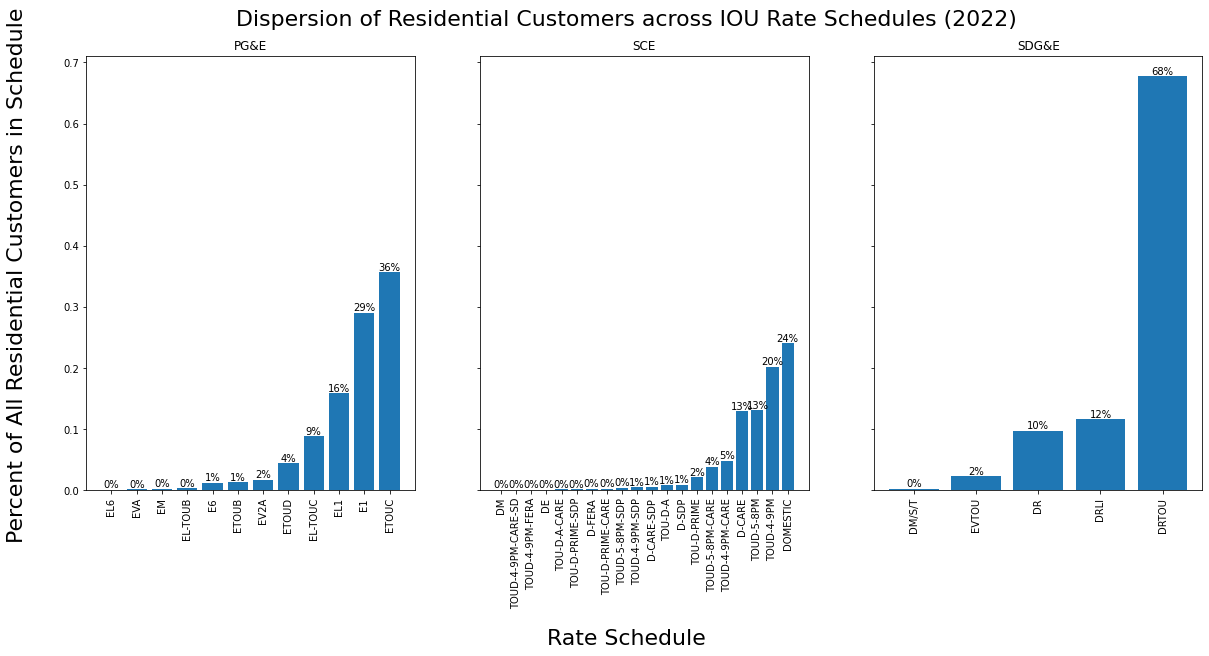

In [227]:
dfs = [PGE_res,SCE_res,SDGE_res]
df_names=["PG&E","SCE","SDG&E"]

fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,8),sharey=True)
for idx,df in enumerate(dfs):
    bars = axs[idx].bar(x=df['rate_schedule'],height=df['pct of total'])
    axs[idx].bar_label(axs[idx].containers[0],fmt='{:.0%}',fontsize=10)
    axs[idx].tick_params(axis='x', labelrotation=90)
    axs[idx].set_title(df_names[idx])
fig.supylabel('Percent of All Residential Customers in Schedule',fontsize=22,x=0.07)
fig.supxlabel('Rate Schedule',fontsize=22,y=-0.15)
fig.suptitle('Dispersion of Residential Customers across IOU Rate Schedules (2022)',fontsize=22,y=0.96)
fig.savefig('Dispersion of Residential Customers across IOU Rate Schedules (2022).png',dpi=600,bbox_inches='tight')